In [1]:
import pandas as pd
df = pd.read_csv('churn-bigml-prepared.csv')
X = df.drop('Churn', axis=1)
y = df['Churn']

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from utils.plot import create_metrics, confusion_plot
from utils.model import gen_stacked_metrics, init_plot
from warnings import simplefilter
from sklearn.metrics._classification import UndefinedMetricWarning
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=RuntimeWarning)
simplefilter(action='ignore', category=UndefinedMetricWarning)

,classifier,accuracy_score,roc_auc_score,f1_score,recall_score,precision_score
0,K-nearest neighbors,0.849091,0.554367,0.209524,0.133333,0.488889
1,Naive Bayes classifier,0.852727,0.691266,0.484076,0.460606,0.510067
2,Support vector machine,0.850000,0.500000,0.000000,0.000000,0.000000
3,Logistic Regression,0.850909,0.547950,0.188119,0.115152,0.513514
4,Decision tree,0.875455,0.694652,0.512456,0.436364,0.620690
5,Random forest,0.887273,0.691622,0.523077,0.412121,0.715789
6,Linear discriminant analysis,0.858182,0.592157,0.309735,0.212121,0.573770


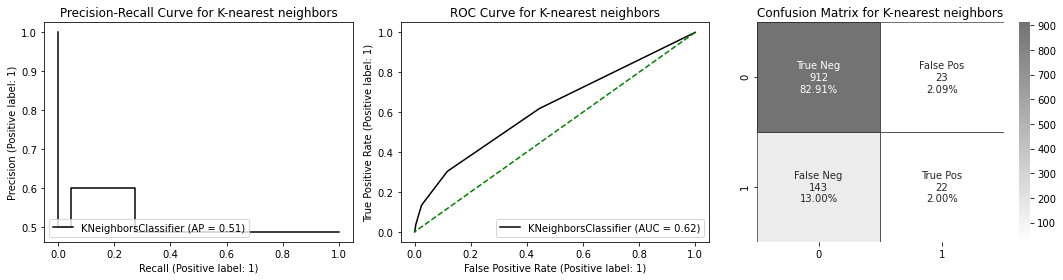

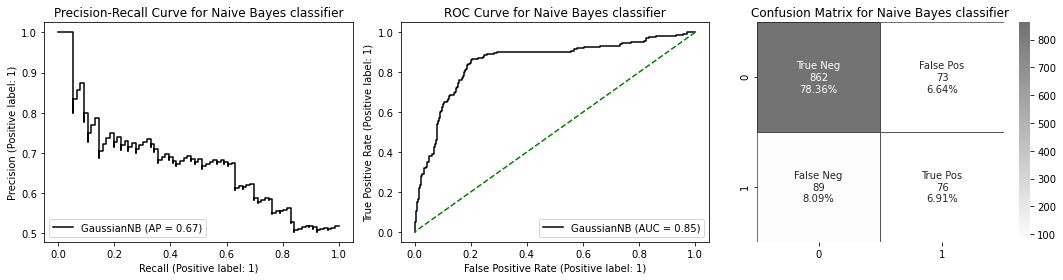

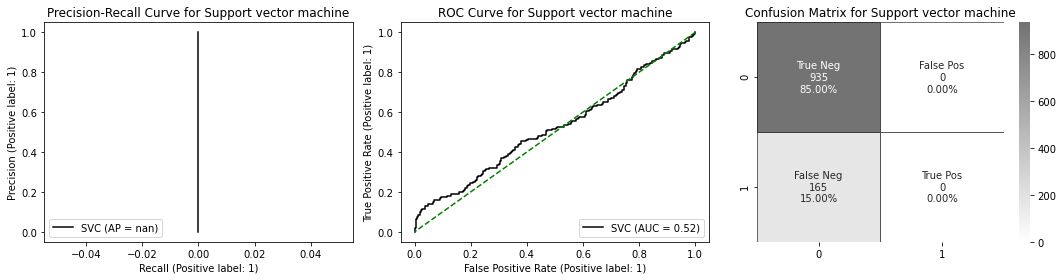

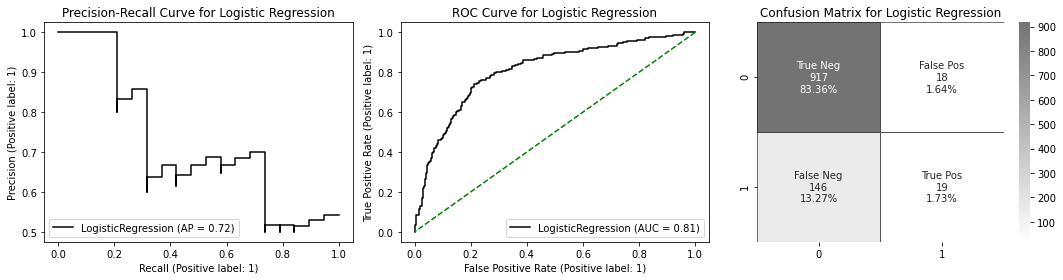

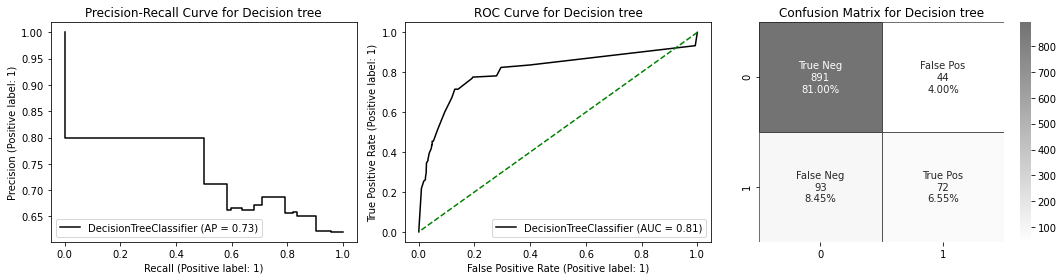

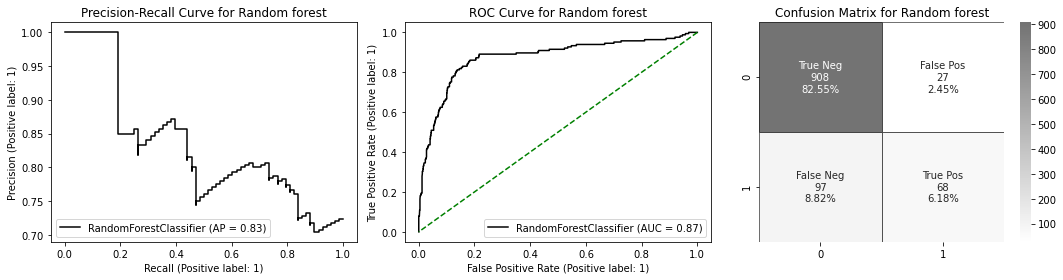

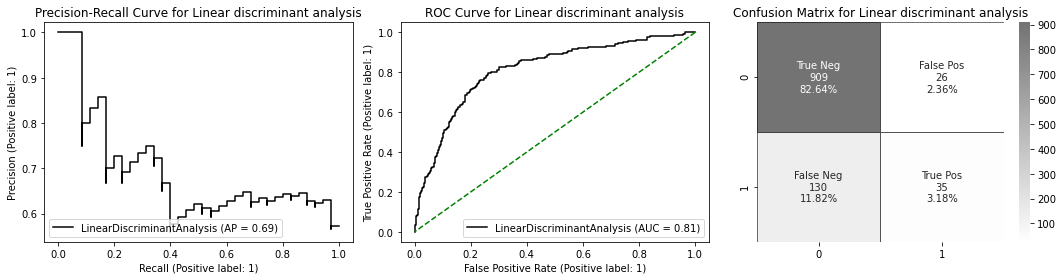

In [3]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.33, random_state=42)
create_metrics(X_train, X_valid, y_train, y_valid)

In [4]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

<AxesSubplot:ylabel='Churn'>

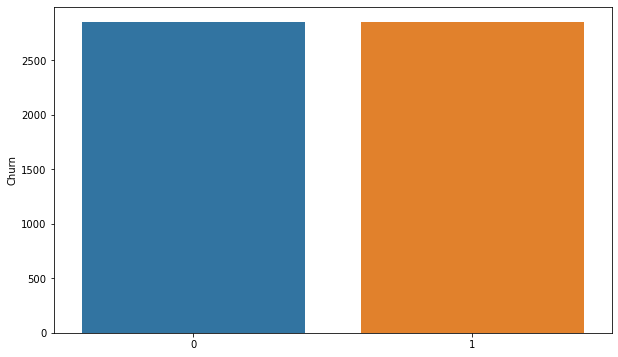

In [5]:
plt.figure(figsize = (10,6))
sns.barplot(x=y_resampled.value_counts().index, y=y_resampled.value_counts())

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_resampled, y_resampled, test_size=0.33, random_state=42)

,classifier,accuracy_score,roc_auc_score,f1_score,recall_score,precision_score
0,K-nearest neighbors,0.768740,0.771629,0.794132,0.910966,0.703859
1,Naive Bayes classifier,0.763955,0.762553,0.742459,0.694897,0.797011
2,Support vector machine,0.621478,0.620698,0.601344,0.583062,0.620809
3,Logistic Regression,0.748538,0.748485,0.743909,0.745928,0.741901
4,Decision tree,0.828814,0.828564,0.823658,0.816504,0.830939
5,Random forest,0.837852,0.838367,0.839050,0.863192,0.816222
6,Linear discriminant analysis,0.746411,0.746203,0.739771,0.736156,0.743421


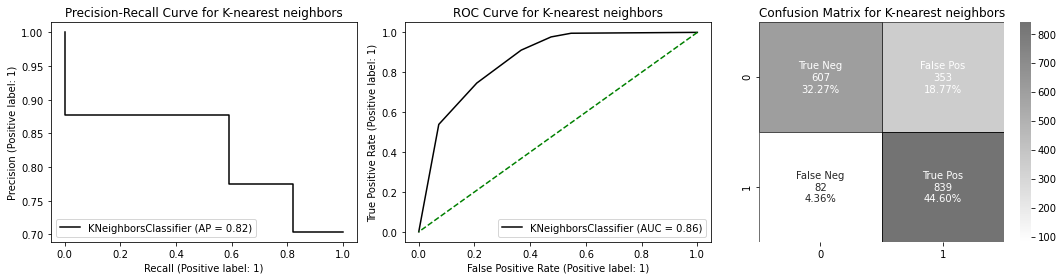

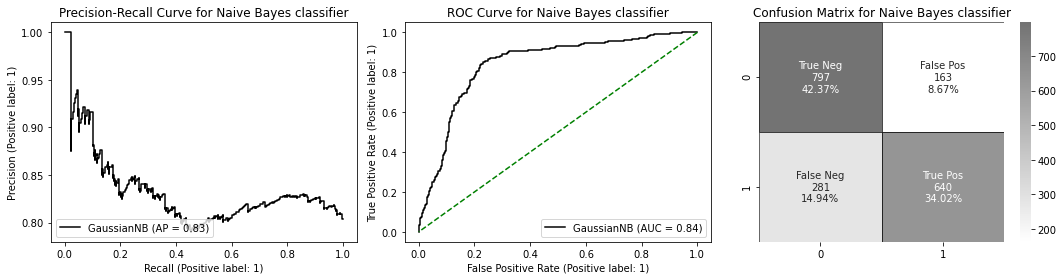

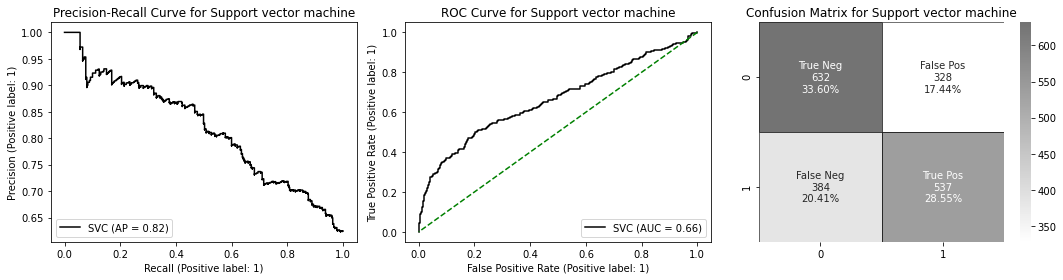

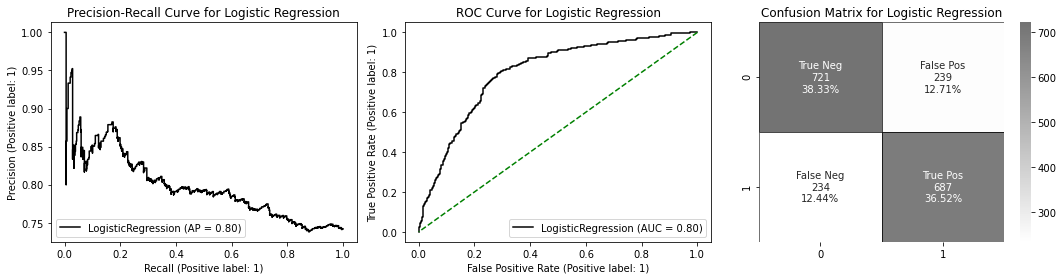

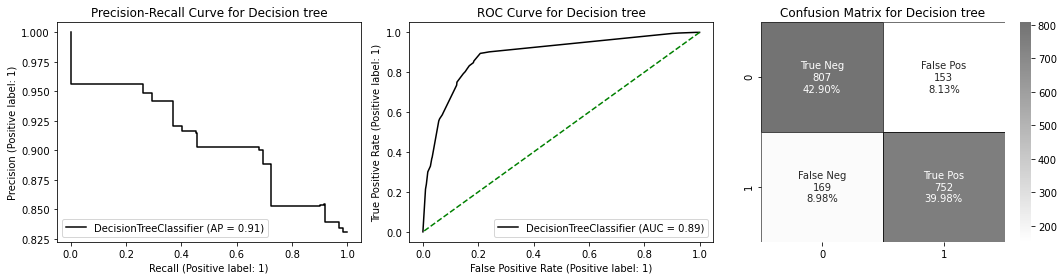

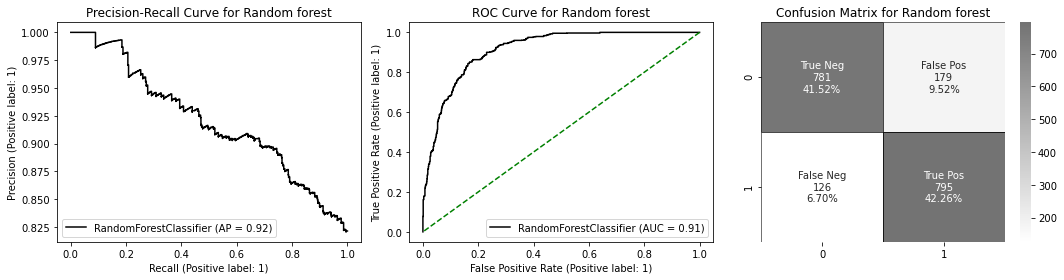

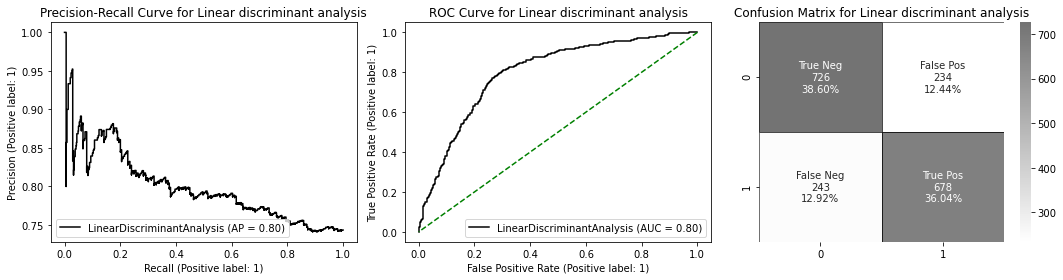

In [7]:
create_metrics(X_train, X_valid, y_train, y_valid)

In [8]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled_smote, y_resampled_smote = SMOTE().fit_resample(X, y)

<AxesSubplot:ylabel='Churn'>

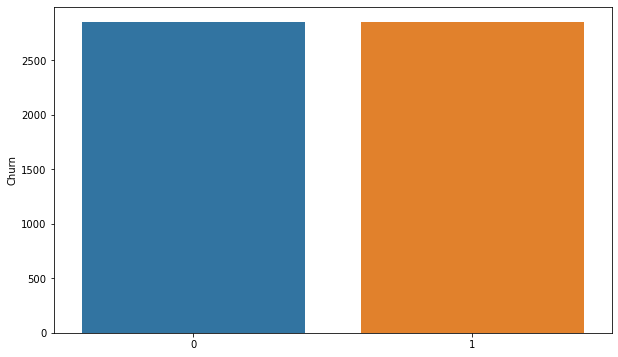

In [9]:
plt.figure(figsize = (10,6))
sns.barplot(x=y_resampled_smote.value_counts().index, y=y_resampled_smote.value_counts())

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_resampled, y_resampled, test_size=0.33, random_state=42)

,classifier,accuracy_score,roc_auc_score,f1_score,recall_score,precision_score
0,K-nearest neighbors,0.768740,0.771629,0.794132,0.910966,0.703859
1,Naive Bayes classifier,0.763955,0.762553,0.742459,0.694897,0.797011
2,Support vector machine,0.621478,0.620698,0.601344,0.583062,0.620809
3,Logistic Regression,0.748538,0.748485,0.743909,0.745928,0.741901
4,Decision tree,0.828814,0.828564,0.823658,0.816504,0.830939
5,Random forest,0.837852,0.838367,0.839050,0.863192,0.816222
6,Linear discriminant analysis,0.746411,0.746203,0.739771,0.736156,0.743421


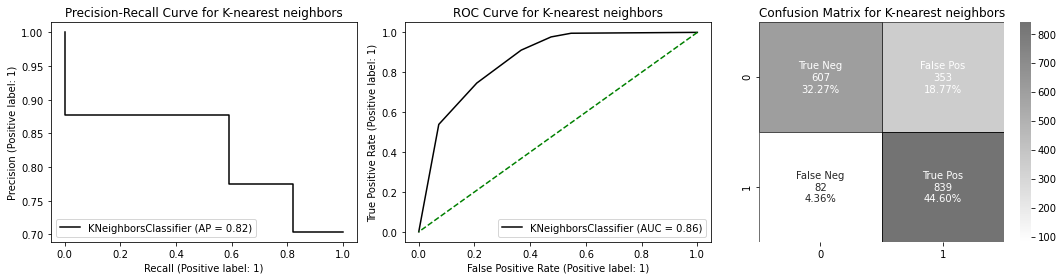

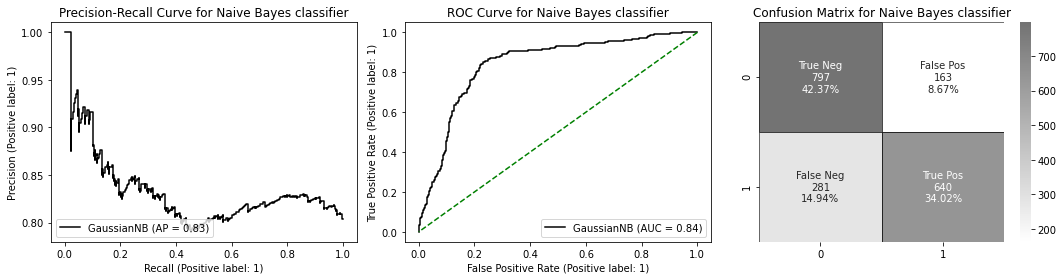

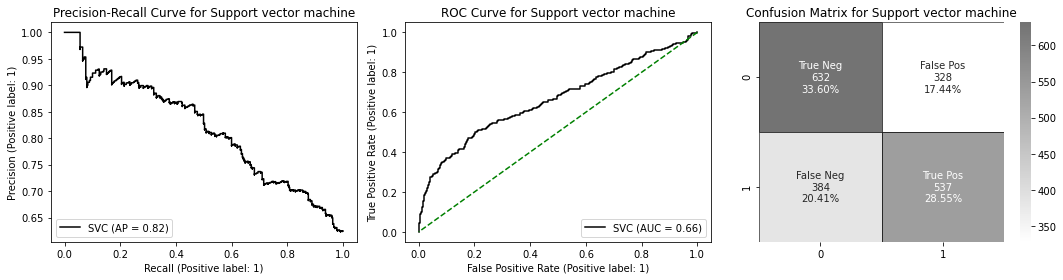

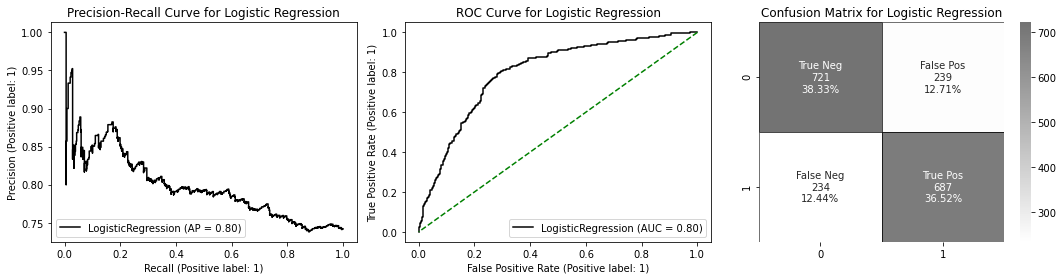

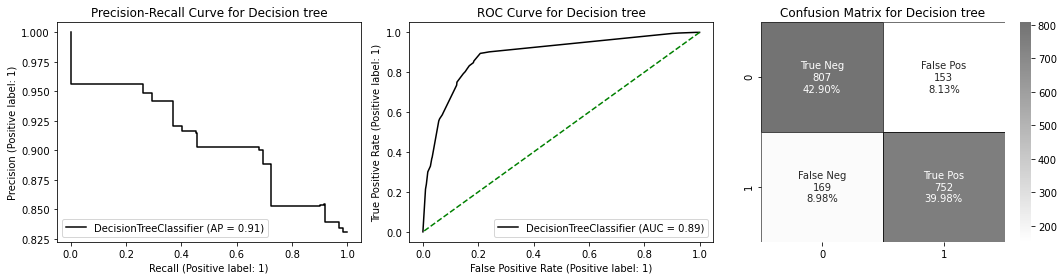

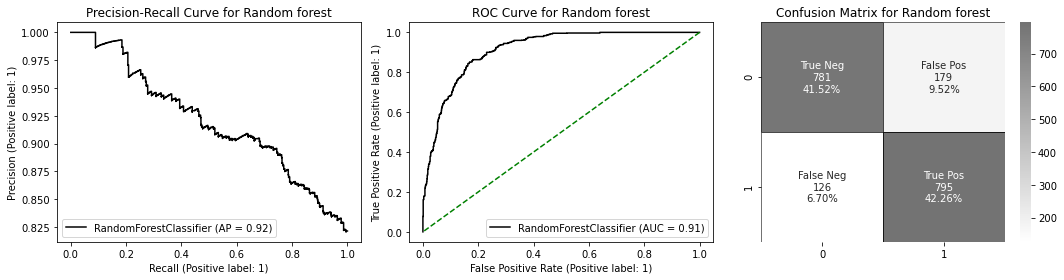

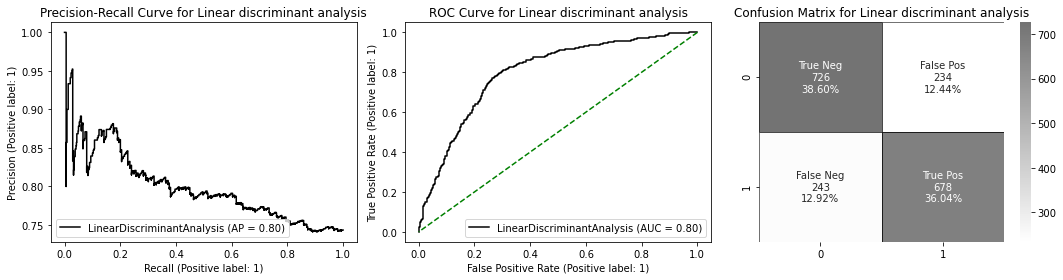

In [11]:
create_metrics(X_train, X_valid, y_train, y_valid)

In [12]:
X_resampled_adasyn, y_resampled_adasyn = ADASYN().fit_resample(X, y)

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_resampled_adasyn, y_resampled_adasyn, test_size=0.33, random_state=42)

,classifier,accuracy_score,roc_auc_score,f1_score,recall_score,precision_score
0,K-nearest neighbors,0.733763,0.737270,0.748223,0.824385,0.684944
1,Naive Bayes classifier,0.690821,0.687462,0.652174,0.604027,0.708661
2,Support vector machine,0.575416,0.575441,0.565623,0.576063,0.555556
3,Logistic Regression,0.647343,0.647528,0.639605,0.652125,0.627557
4,Decision tree,0.727858,0.727611,0.717863,0.721477,0.714286
5,Random forest,0.733226,0.731862,0.715186,0.697987,0.733255
6,Linear discriminant analysis,0.646806,0.647012,0.639254,0.652125,0.626882


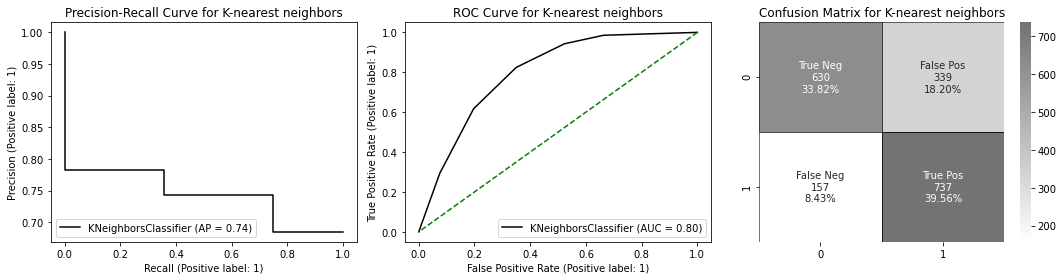

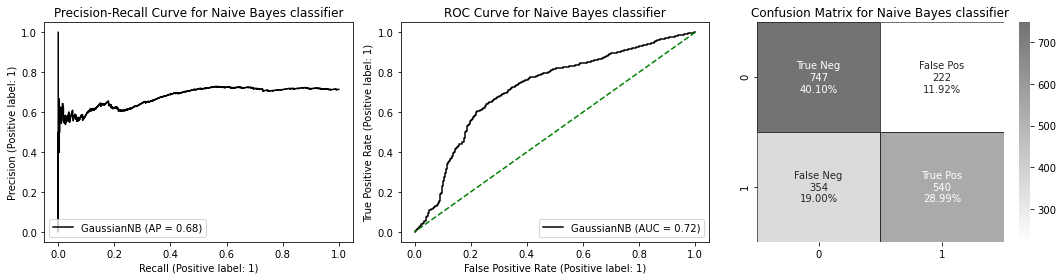

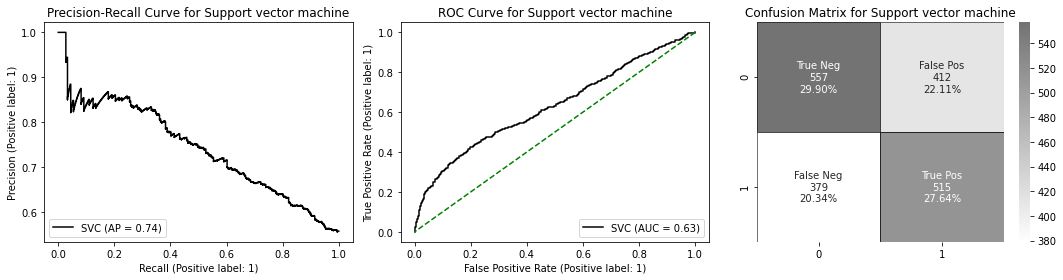

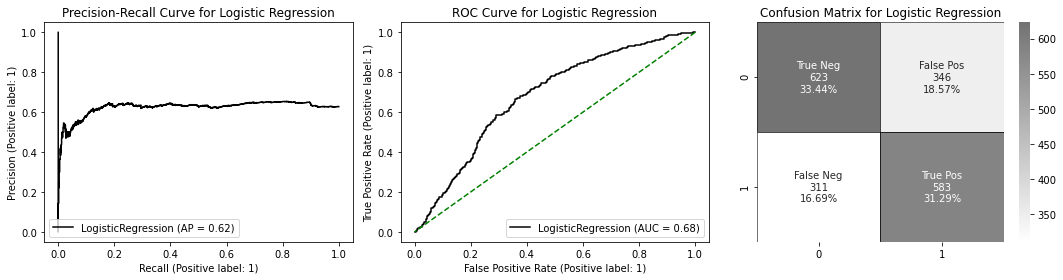

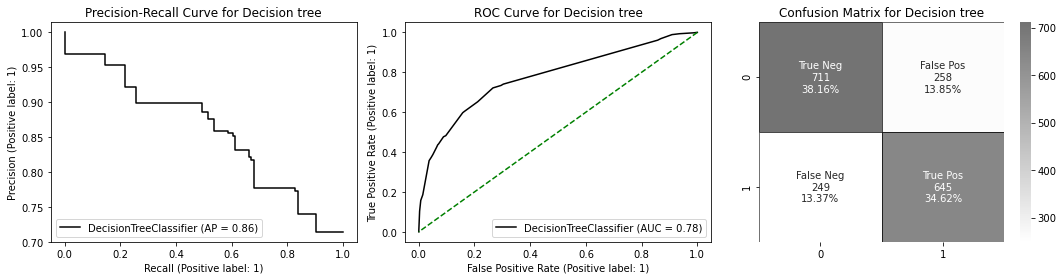

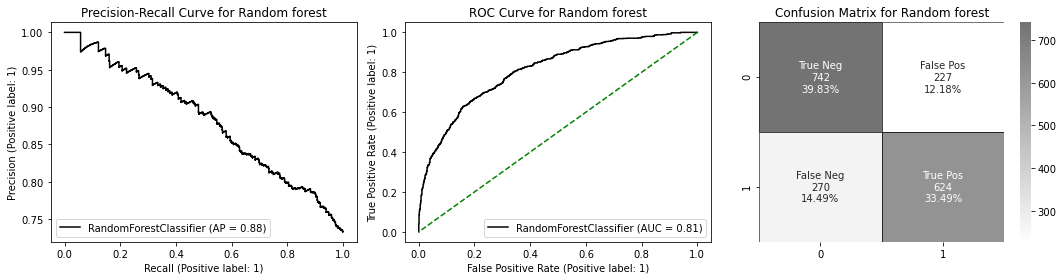

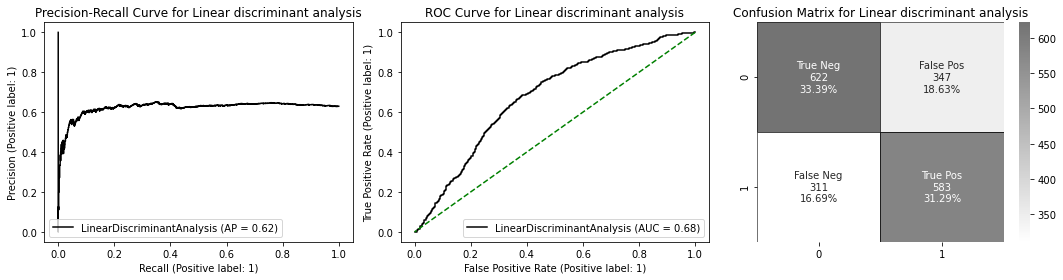

In [14]:
create_metrics(X_train, X_valid, y_train, y_valid)

In [15]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_u_resampled, y_u_resampled = rus.fit_resample(X, y)

<AxesSubplot:ylabel='Churn'>

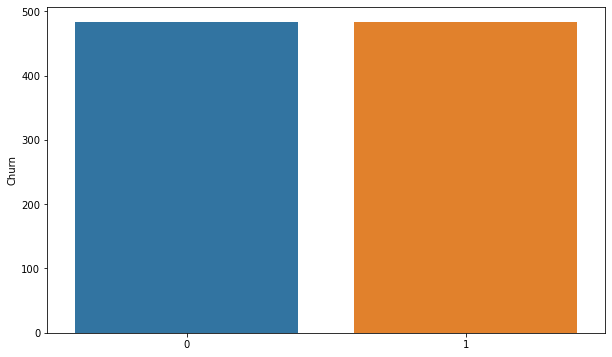

In [16]:
plt.figure(figsize = (10,6))
sns.barplot(x=y_u_resampled.value_counts().index, y=y_u_resampled.value_counts())

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_u_resampled, y_u_resampled, test_size=0.33, random_state=42)

,classifier,accuracy_score,roc_auc_score,f1_score,recall_score,precision_score
0,K-nearest neighbors,0.605016,0.604627,0.585526,0.563291,0.609589
1,Naive Bayes classifier,0.774295,0.773862,0.761589,0.727848,0.798611
2,Support vector machine,0.536050,0.535773,0.519481,0.506329,0.533333
3,Logistic Regression,0.711599,0.711691,0.712500,0.721519,0.703704
4,Decision tree,0.755486,0.755700,0.759259,0.778481,0.740964
5,Random forest,0.783699,0.784004,0.788991,0.816456,0.763314
6,Linear discriminant analysis,0.717868,0.717843,0.715190,0.715190,0.715190


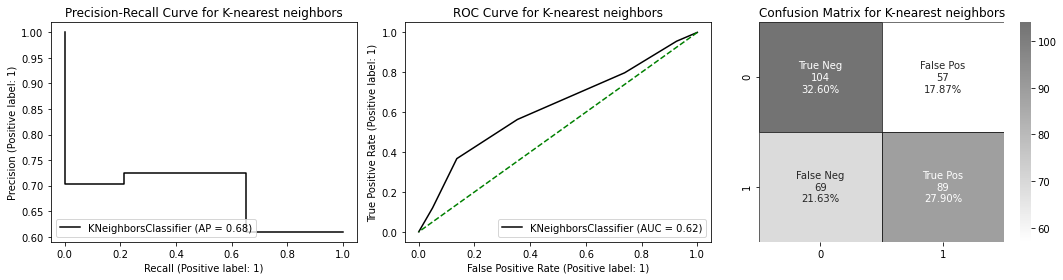

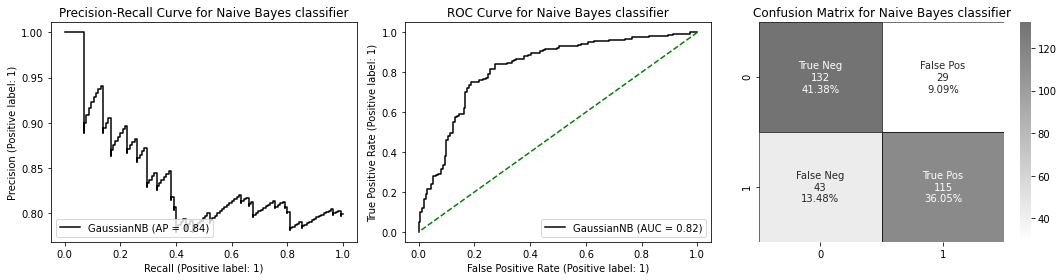

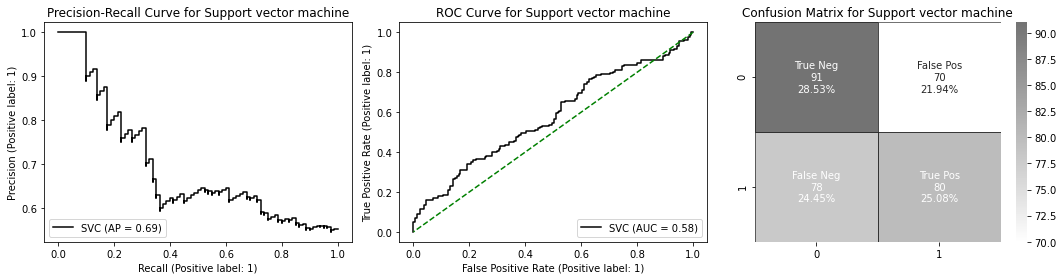

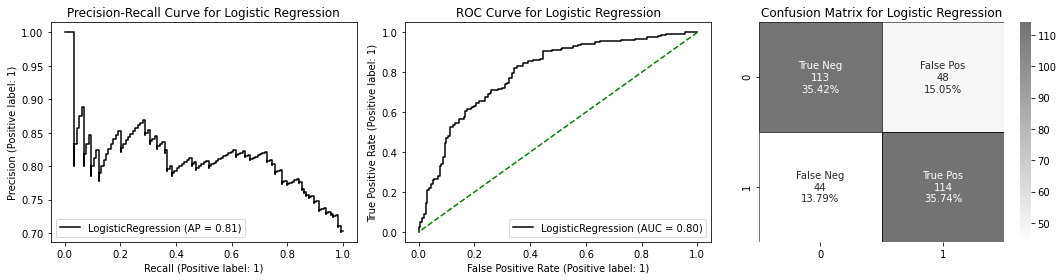

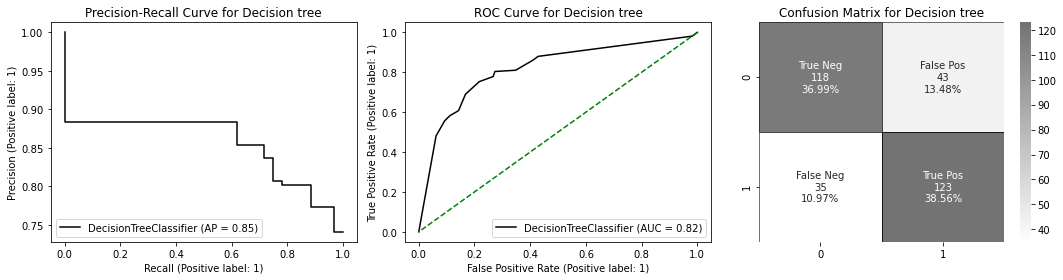

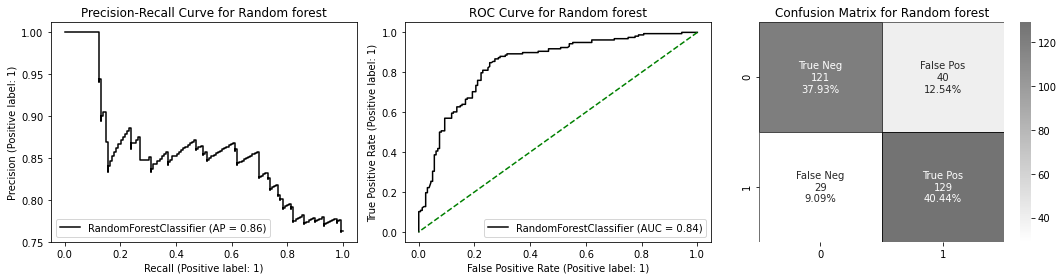

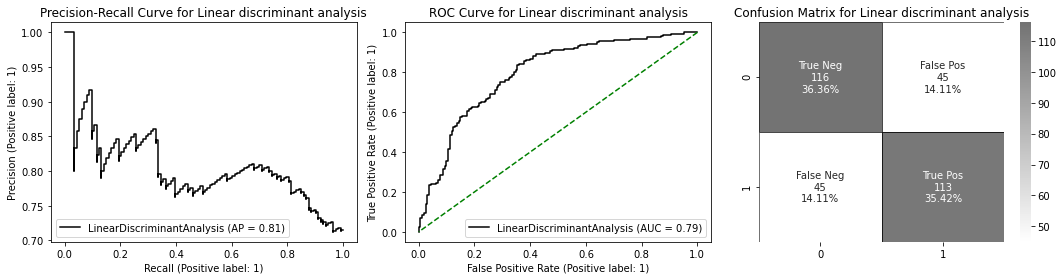

In [18]:
create_metrics(X_train, X_valid, y_train, y_valid)

In [19]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_c_resampled, y_c_resampled = cc.fit_resample(X, y)

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_c_resampled, y_c_resampled, test_size=0.33, random_state=42)

,classifier,accuracy_score,roc_auc_score,f1_score,recall_score,precision_score
0,K-nearest neighbors,0.520376,0.520776,0.537764,0.563291,0.514451
1,Naive Bayes classifier,0.793103,0.791552,0.750000,0.626582,0.933962
2,Support vector machine,0.595611,0.596843,0.640669,0.727848,0.572139
3,Logistic Regression,0.808777,0.808613,0.803859,0.791139,0.816993
4,Decision tree,0.824451,0.823787,0.809524,0.753165,0.875000
5,Random forest,0.821317,0.821212,0.817891,0.810127,0.825806
6,Linear discriminant analysis,0.805643,0.805095,0.791946,0.746835,0.842857


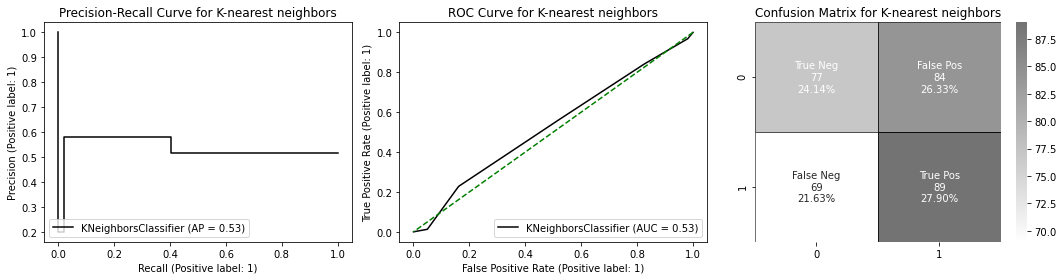

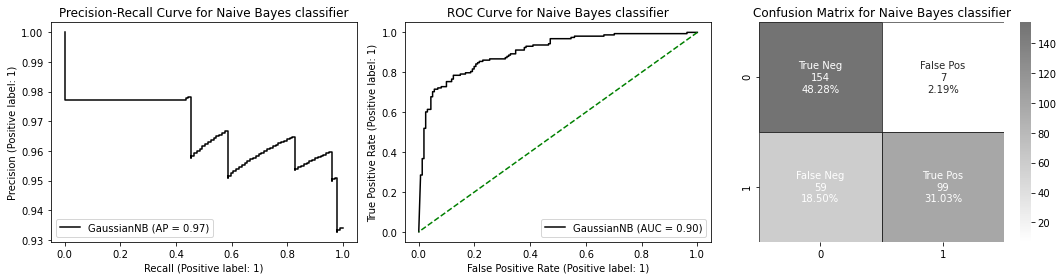

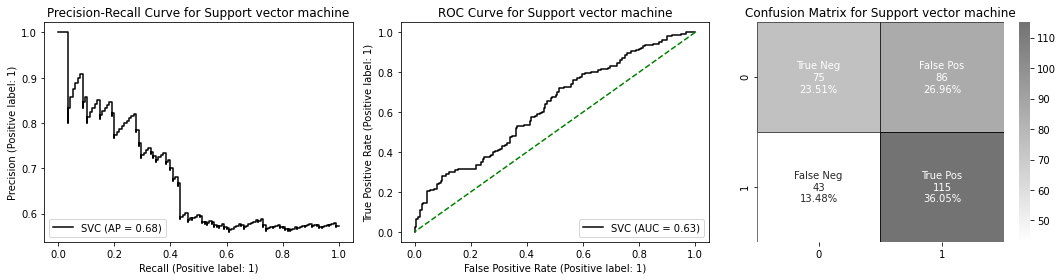

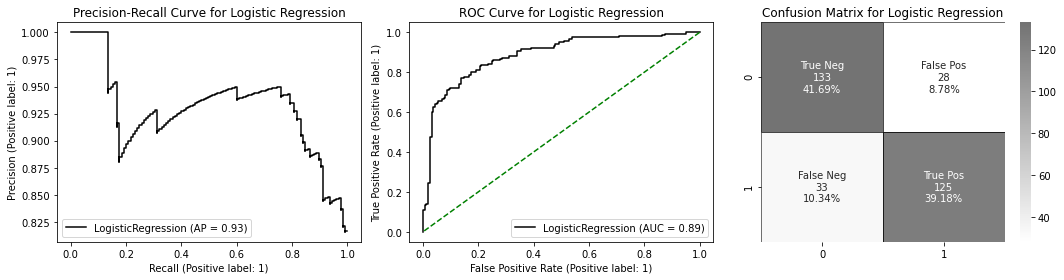

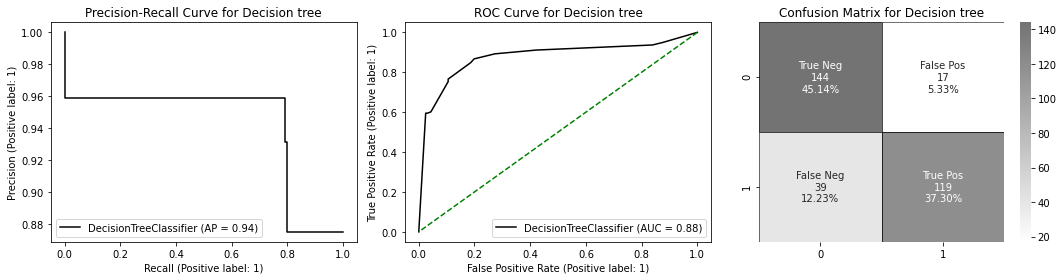

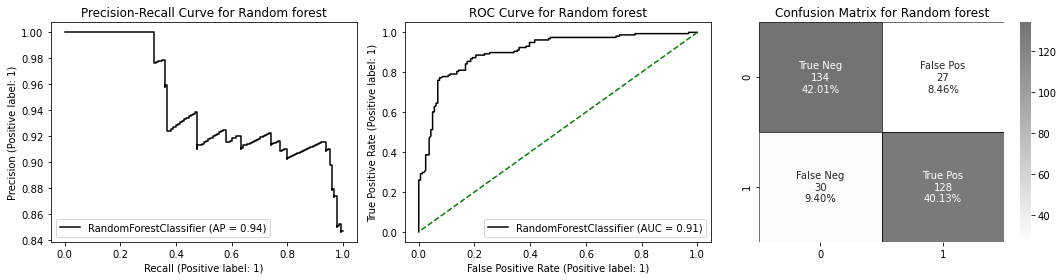

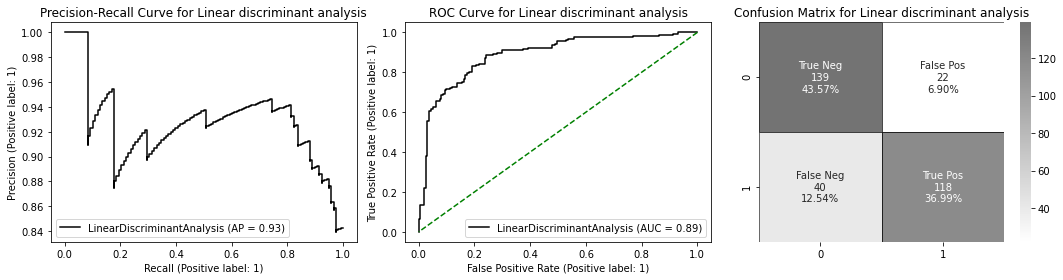

In [21]:
create_metrics(X_train, X_valid, y_train, y_valid)

In [22]:
from imblearn.under_sampling import TomekLinks 
tl = TomekLinks()
X_tl_resampled, y_tl_resampled = tl.fit_resample(X, y)

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_tl_resampled, y_tl_resampled, test_size=0.33, random_state=42)

,classifier,accuracy_score,roc_auc_score,f1_score,recall_score,precision_score
0,K-nearest neighbors,0.859496,0.602852,0.337900,0.229814,0.637931
1,Naive Bayes classifier,0.854651,0.713901,0.522293,0.509317,0.535948
2,Support vector machine,0.843992,0.500000,0.000000,0.000000,0.000000
3,Logistic Regression,0.849806,0.564201,0.236453,0.149068,0.571429
4,Decision tree,0.893411,0.703953,0.556452,0.428571,0.793103
5,Random forest,0.890504,0.714888,0.567050,0.459627,0.740000
6,Linear discriminant analysis,0.851744,0.600791,0.331878,0.236025,0.558824


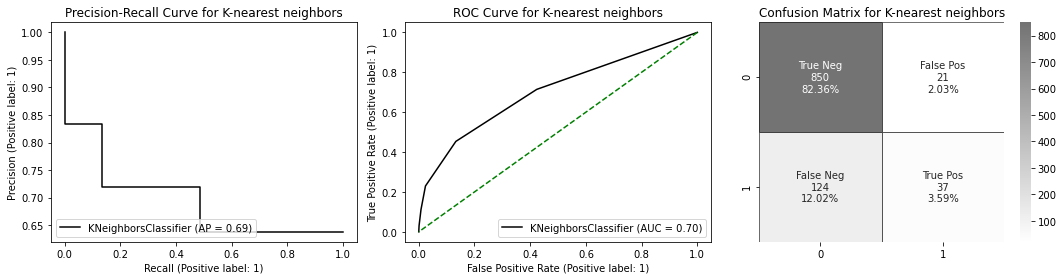

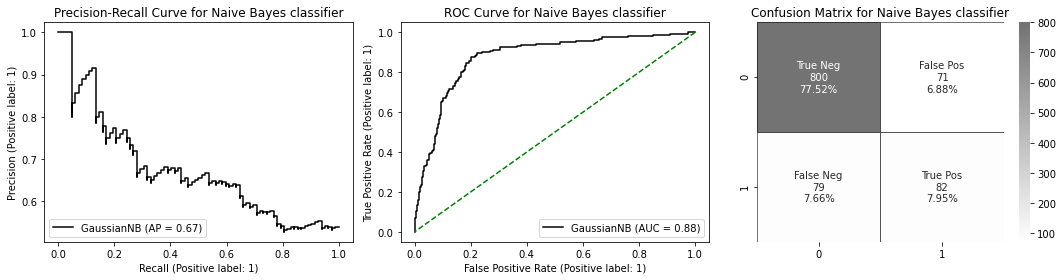

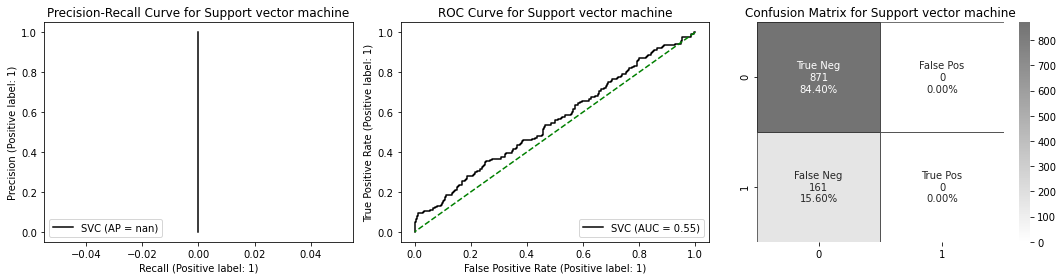

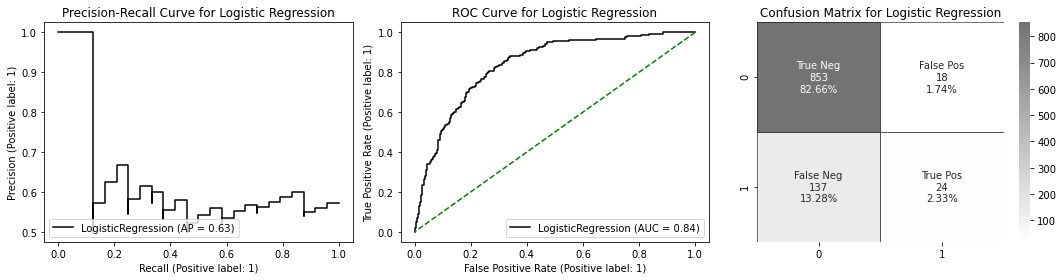

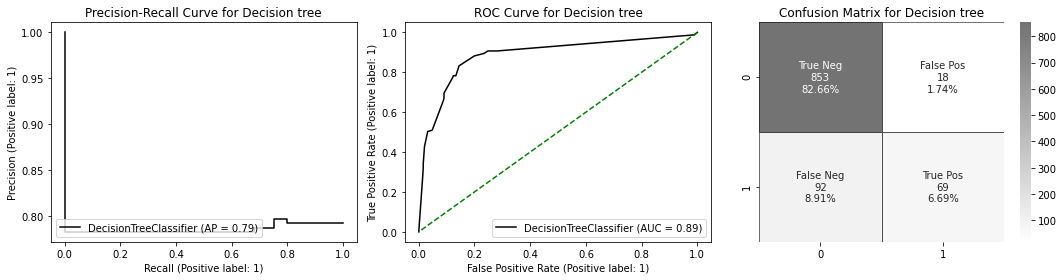

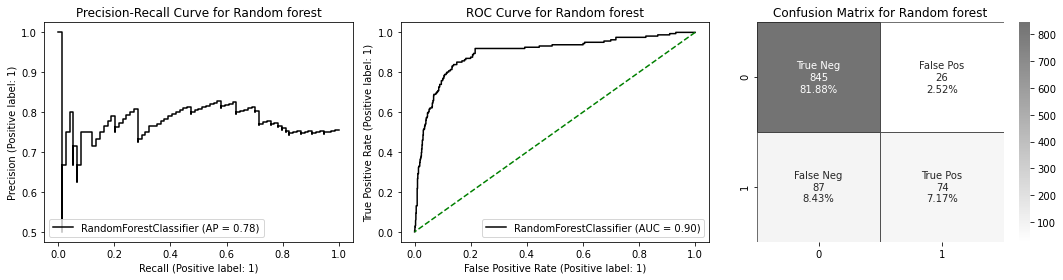

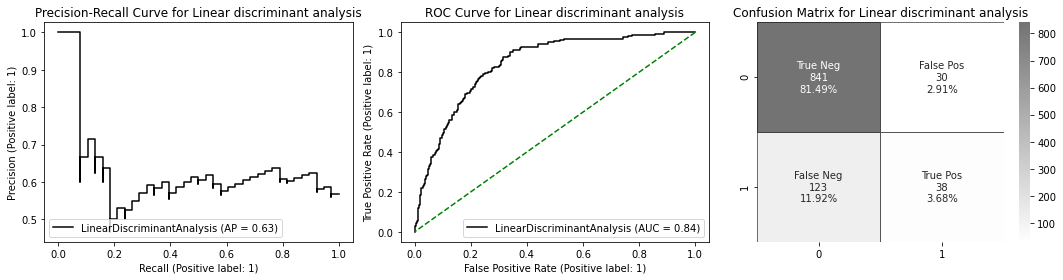

In [24]:
create_metrics(X_train, X_valid, y_train, y_valid)

In [25]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled_smote_tomek, y_resampled_smote_tomek = smote_tomek.fit_resample(X, y)

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_resampled_smote_tomek, y_resampled_smote_tomek, test_size=0.33, random_state=42)

,classifier,accuracy_score,roc_auc_score,f1_score,recall_score,precision_score
0,K-nearest neighbors,0.802484,0.802793,0.812570,0.860880,0.769394
1,Naive Bayes classifier,0.723832,0.723538,0.706474,0.668252,0.749333
2,Support vector machine,0.609107,0.608910,0.592730,0.571938,0.615090
3,Logistic Regression,0.676523,0.676567,0.678046,0.684899,0.671329
4,Decision tree,0.758723,0.758489,0.746584,0.714625,0.781534
5,Random forest,0.764045,0.763859,0.754462,0.728894,0.781888
6,Linear discriminant analysis,0.676523,0.676573,0.678424,0.686088,0.670930


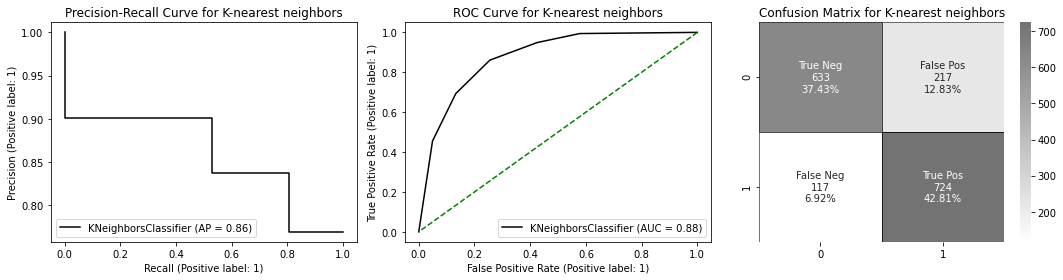

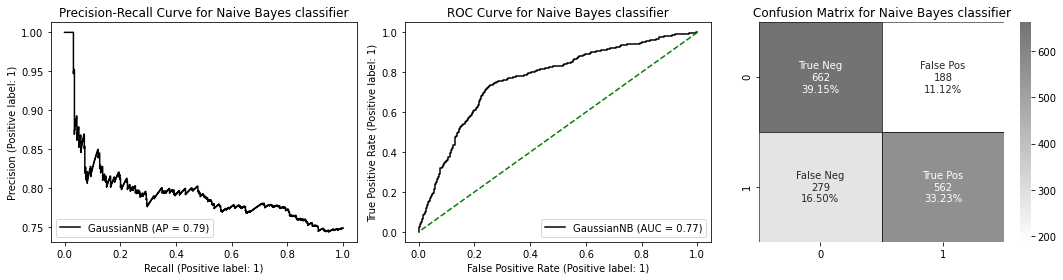

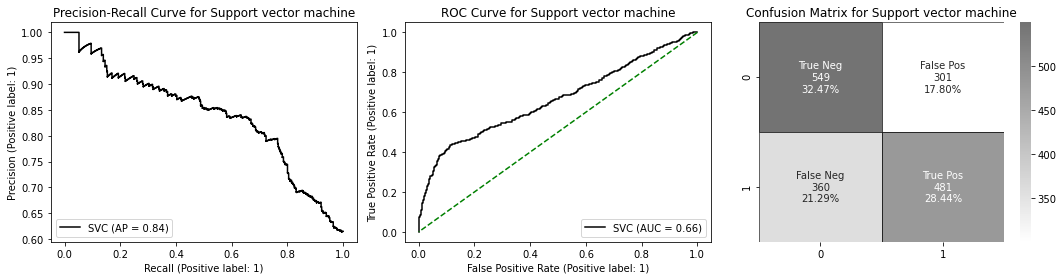

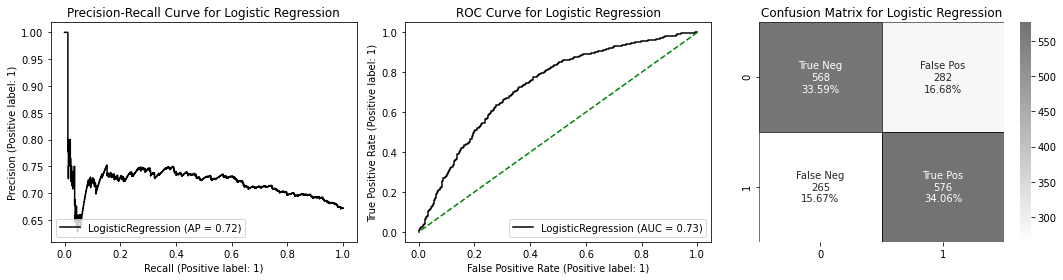

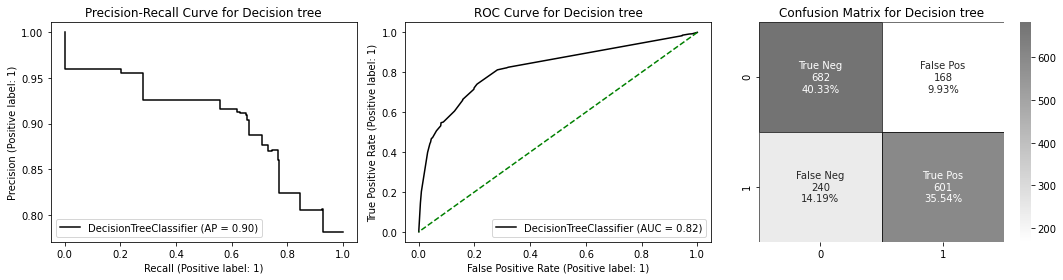

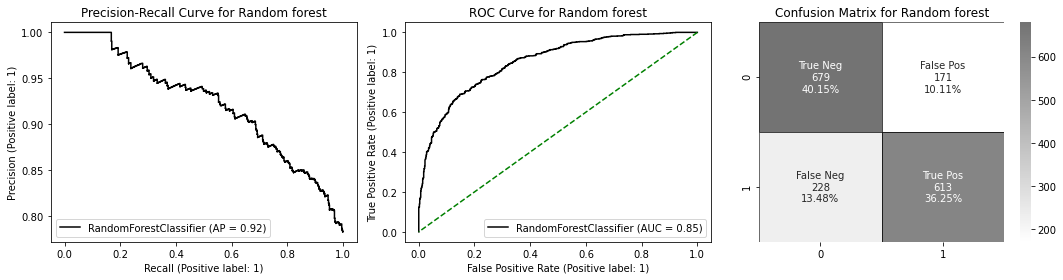

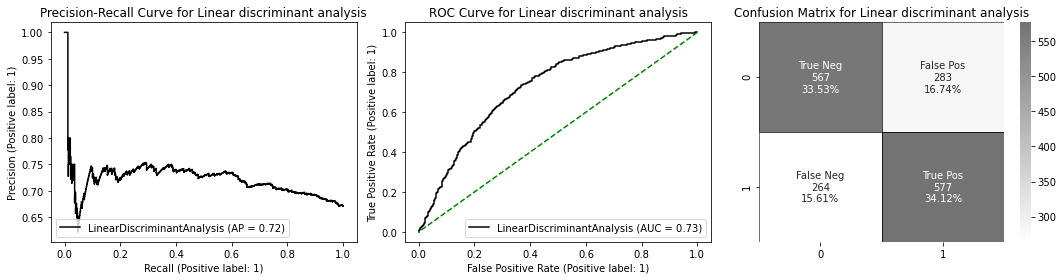

In [27]:
create_metrics(X_train, X_valid, y_train, y_valid)

,classifier,accuracy_score,ROC AUC score,f1_score,recall_score,precision_score
0,Bagging Classifier,0.868182,0.672906,0.472727,0.393939,0.590909


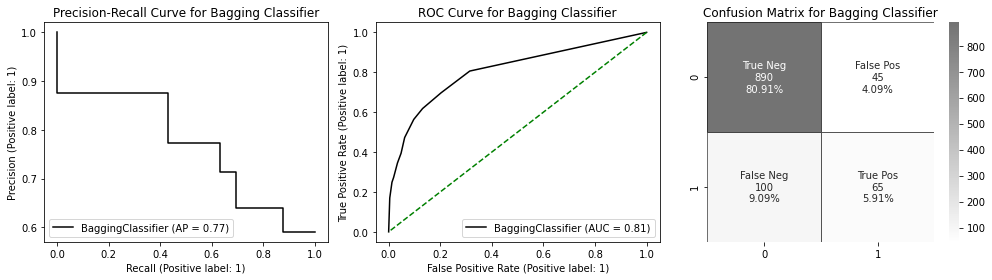

In [28]:
from sklearn.ensemble import BaggingClassifier


X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.33, random_state=42)


reg = BaggingClassifier()
cls_name = 'Bagging Classifier'

regmodel = reg.fit(X_train, y_train)
y_pred = reg.predict(X_valid)

init_plot(cls_name, regmodel, X_valid, y_valid, y_pred)

stacked_metrics = gen_stacked_metrics(cls_name, y_valid, y_pred)
    
plt.tight_layout()

pd.DataFrame([stacked_metrics])

,classifier,accuracy_score,ROC AUC score,f1_score,recall_score,precision_score
0,Easy Ensemble Classifier,0.84,0.816043,0.59447,0.781818,0.479554


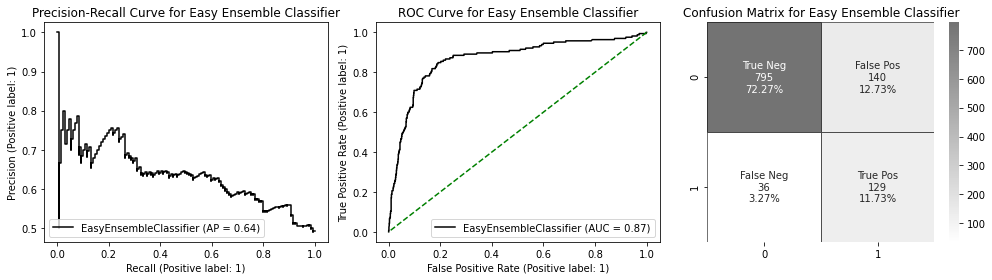

In [29]:
from imblearn.ensemble import EasyEnsembleClassifier

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.33, random_state=42)

stacked_metrics={}

eec = EasyEnsembleClassifier()
cls_name = 'Easy Ensemble Classifier'

regmodel = eec.fit(X_train, y_train)
y_pred = eec.predict(X_valid)

init_plot(cls_name, regmodel, X_valid, y_valid, y_pred)

stacked_metrics = gen_stacked_metrics(cls_name, y_valid, y_pred)
    
plt.tight_layout()

pd.DataFrame([stacked_metrics])

,classifier,accuracy_score,ROC AUC score,f1_score,recall_score,precision_score
0,Ada Boost Classifier,0.866364,0.624421,0.384937,0.278788,0.621622


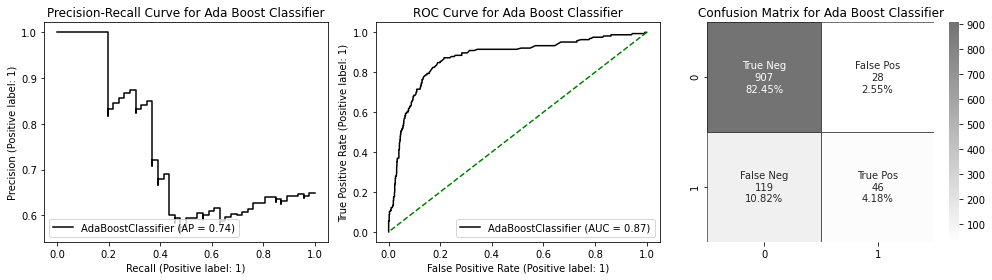

In [30]:
from sklearn.ensemble import AdaBoostClassifier

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.33, random_state=42)

abc = AdaBoostClassifier()
cls_name = 'Ada Boost Classifier'

regmodel = abc.fit(X_train, y_train)
y_pred = abc.predict(X_valid)

init_plot(cls_name, regmodel, X_valid, y_valid, y_pred)

stacked_metrics = gen_stacked_metrics(cls_name, y_valid, y_pred)
    
plt.tight_layout()

pd.DataFrame([stacked_metrics])

,classifier,accuracy_score,ROC AUC score,f1_score,recall_score,precision_score
0,SMOTE Boost,0.87,0.733868,0.554517,0.539394,0.570513


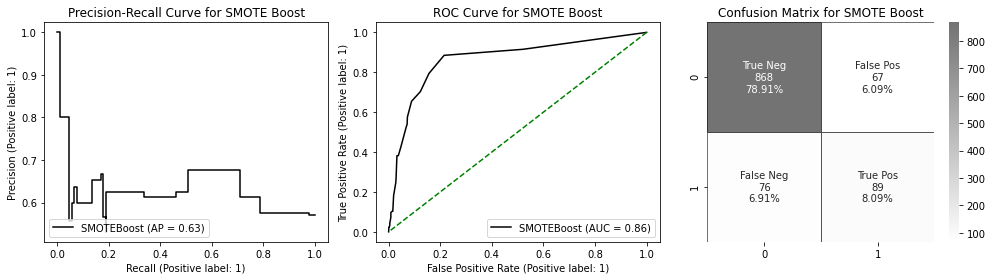

In [31]:
from utils.smote import SMOTEBoost
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.33, random_state=42)

sb = SMOTEBoost()
cls_name = 'SMOTE Boost'

regmodel = sb.fit(X_train, y_train)
y_pred = sb.predict(X_valid)

init_plot(cls_name, regmodel, X_valid, y_valid, y_pred)

stacked_metrics = gen_stacked_metrics(cls_name, y_valid, y_pred)
    
plt.tight_layout()

pd.DataFrame([stacked_metrics])